# 1. Importing Libraries

In [50]:
! python --version

Python 3.11.4


In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import pickle

# 2. Fetching Training Data

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
print("No. of records :",df.shape[0],"\nNo. of columns : ",df.shape[1])

No. of records : 165034 
No. of columns :  14


In [4]:
print(" Information on dataset: ",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB
 Information on dataset:  None


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [6]:
if (df.duplicated()==True).any():
    print("Found duplicate records")
else:
    print("No duplicate records found")

No duplicate records found


# 3. Exploratory Data Analysis


### 3.1 Percentage of exited people in both the classes

In [7]:
percentage_of_retaining_cust = ((df['Exited'].value_counts()[0])/df.shape[0]) * 100
print("Customers retained: ",round(percentage_of_retaining_cust,2),"%")
customer_churn = ((df['Exited'].value_counts()[1])/df.shape[0]) * 100
print("Customer Churn: ",round(customer_churn,2),"%")

Customers retained:  78.84 %
Customer Churn:  21.16 %


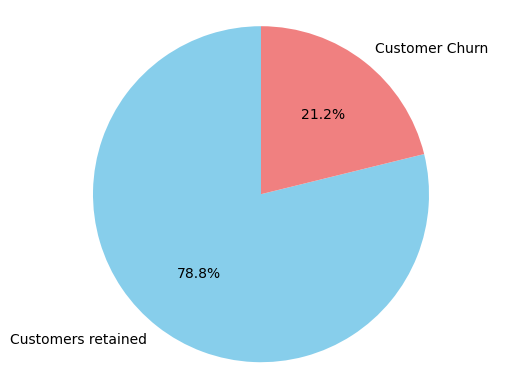

In [8]:
plt.pie([percentage_of_retaining_cust,customer_churn],labels= ['Customers retained','Customer Churn'],
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

### 3.2 Plotting the Gender distribution in the dataset

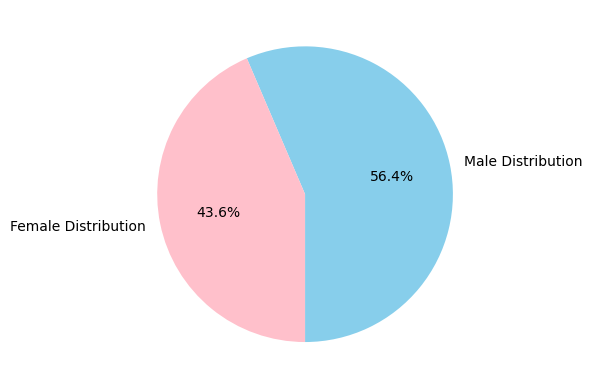

In [9]:
male_share =((df['Gender'].value_counts()[0]) / len(df)) * 100
#print("Male distribution:",round(male_share,2),"%")

female_share =((df['Gender'].value_counts()[1]) / len(df)) * 100
#print("Female distribution:",round(female_share,2),"%")

plt.pie(x=[male_share,female_share],labels = ['Male Distribution','Female Distribution'],autopct='%1.1f%%', 
        startangle=270, colors=['skyblue', 'pink'])
plt.show()

### 3.3 Plotting the Churn percentage based on Gender

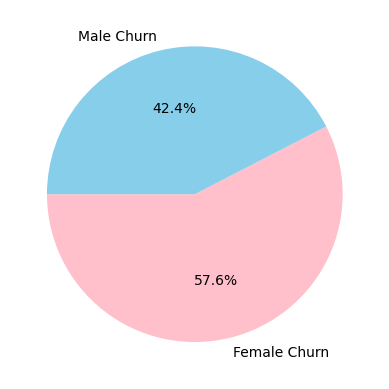

In [10]:
female_churn_count = df[(df['Gender'] == 'Female') & (df['Exited'] == 1)].shape[0]
male_churn_count = df[(df['Gender'] == 'Male') & (df['Exited']==1)].shape[0]

#print(male_churn_count)
#print(female_churn_count)
total_churn = male_churn_count + female_churn_count
#print(total_churn)
Total_female_count = df['Gender'].value_counts()[1]
Total_male_count= df['Gender'].value_counts()[0]

percentage_of_male_churn = (male_churn_count/total_churn )*100
percentage_of_female_churn = (female_churn_count/total_churn) *100

#print("Female Churn Percentage: ",percentage_of_female_churn,"%")
#print("Male Churn Percentage: ",percentage_of_male_churn,"%")

plt.pie(x=[percentage_of_female_churn,percentage_of_male_churn],labels = ['Female Churn','Male Churn'],autopct='%1.1f%%',
        startangle=180,colors = ['pink','skyblue'])
plt.show()

### 3.4 Plotting the churn from each country

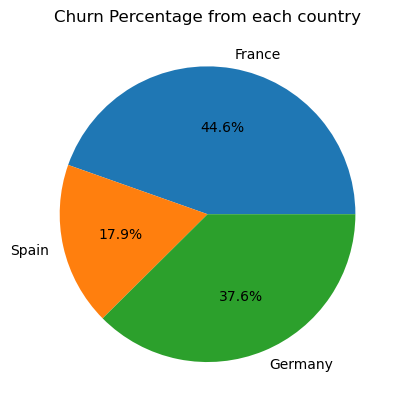

In [11]:
no_of_churn_from_france = df[(df['Geography'] =='France') & (df['Exited'] ==1)].shape[0]
no_of_churn_from_spain = df[(df['Geography'] =='Spain') & (df['Exited'] ==1)].shape[0]
no_of_churn_from_germany = df[(df['Geography'] =='Germany') & (df['Exited'] ==1)].shape[0]

total_churn = df[(df['Exited']==1)].shape[0]

percentage_of_churn_from_france = ((no_of_churn_from_france)/total_churn) * 100
percentage_of_churn_from_spain = ((no_of_churn_from_spain)/total_churn) * 100
percentage_of_churn_from_germany = ((no_of_churn_from_germany)/total_churn) * 100

plt.pie(labels=['France','Spain','Germany'],
        x=[percentage_of_churn_from_france,percentage_of_churn_from_spain,percentage_of_churn_from_germany],
        autopct='%1.1f%%')
plt.title("Churn Percentage from each country")
plt.show()

# 4. Distribution Plots

### 4.1 Relation between Credit Score and Age

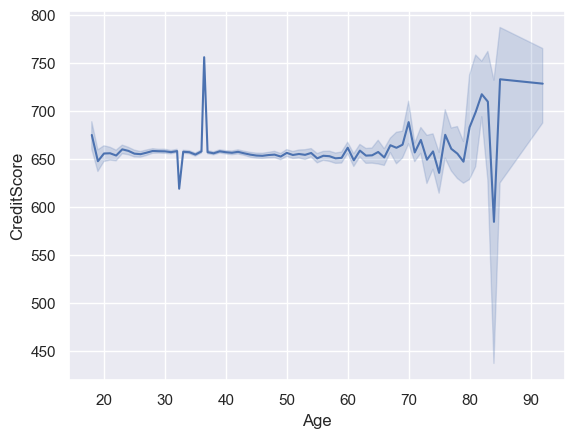

In [12]:
sb.set_theme(style="darkgrid")
sb.lineplot(data =df,x='Age',y='CreditScore')
plt.show()

### 4.2 Relation between Salary of churn & retaining customer with their count

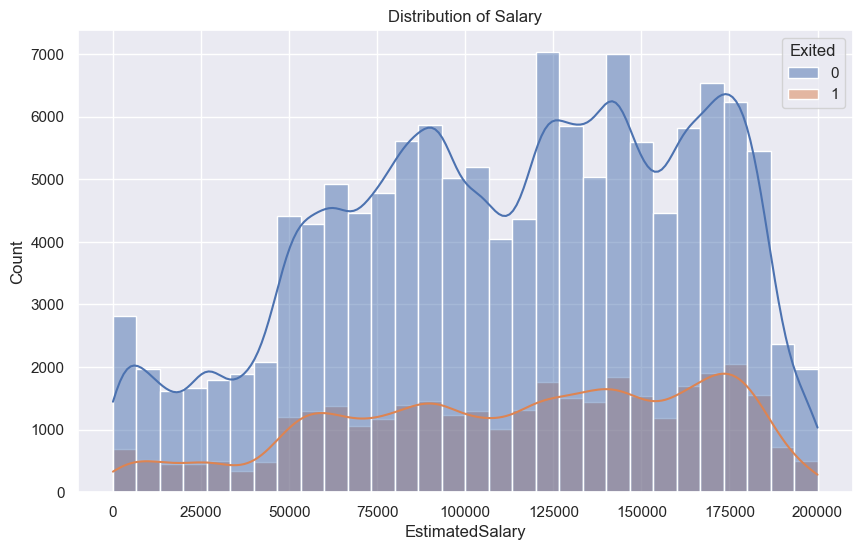

In [13]:
plt.figure(figsize =(10,6))
sb.histplot(data =df, x='EstimatedSalary',bins=30,kde=True,hue = 'Exited')
plt.title("Distribution of Salary")
plt.show()

### 4.3 Distribution of CreditScore among churn & retaining customers

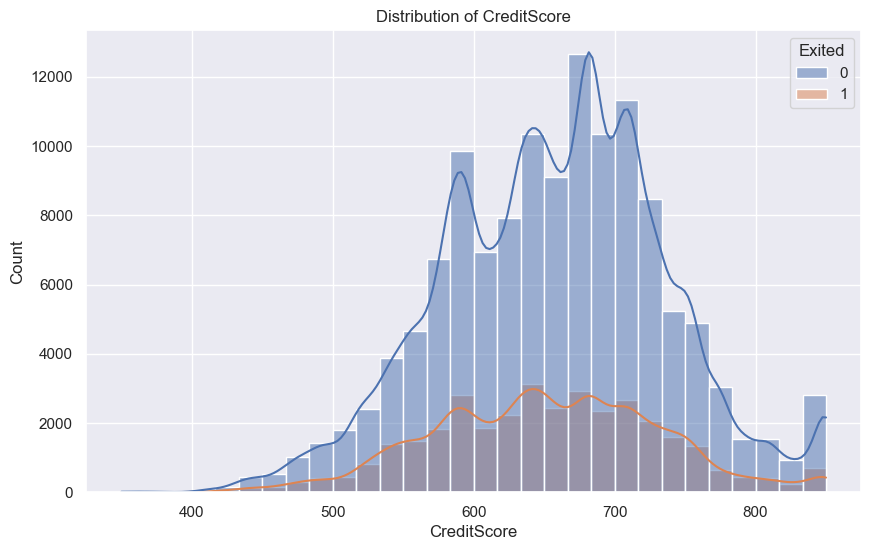

In [14]:
plt.figure(figsize =(10,6))
sb.histplot(data =df, x='CreditScore',bins=30,kde=True,hue='Exited')
plt.title("Distribution of CreditScore")
plt.show()

### 4.4 Tenure of churn & retaining customers

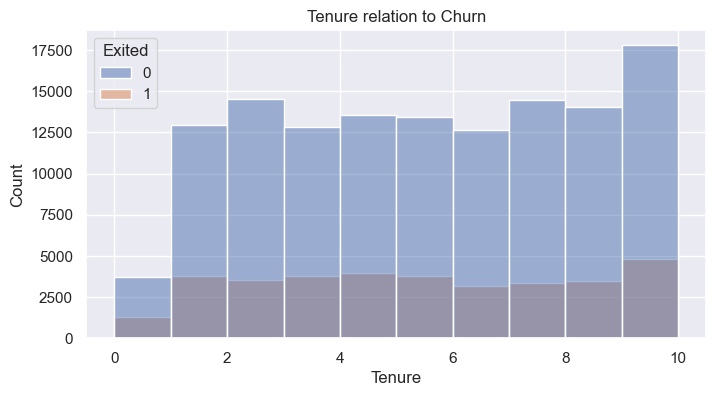

In [15]:
plt.figure(figsize=(8,4))
sb.histplot(data = df, x= 'Tenure',hue ='Exited',bins=10)

plt.title("Tenure relation to Churn")
plt.show()

### 4.5 Salary range among both churn & retaining customers

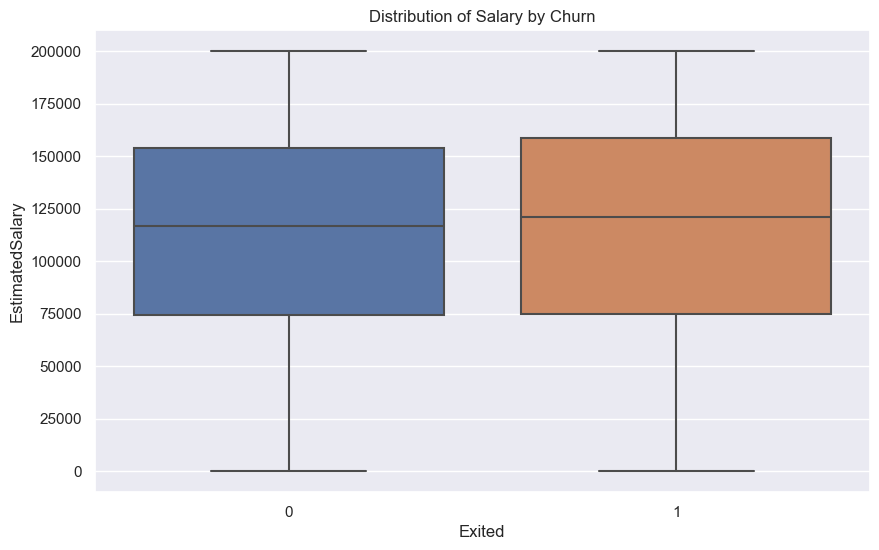

In [16]:
plt.figure(figsize=(10,6))
sb.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('Distribution of Salary by Churn')
plt.show()

### 4.6 Does credit score effects the churn of customers??

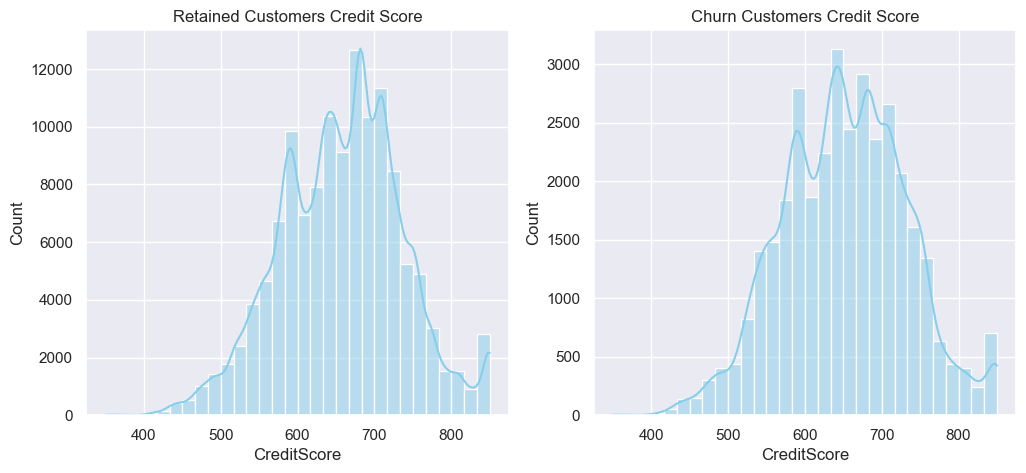

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sb.histplot(df[df['Exited']==0]['CreditScore'],bins=30,color='skyblue',kde=True)
plt.title("Retained Customers Credit Score")

plt.subplot(1,2,2)
sb.histplot(df[df['Exited']==1]['CreditScore'],bins=30,color='skyblue',kde=True)
plt.title("Churn Customers Credit Score")
plt.show()

### 4.7 Effect of salary, creditcard and membership together on customer churn

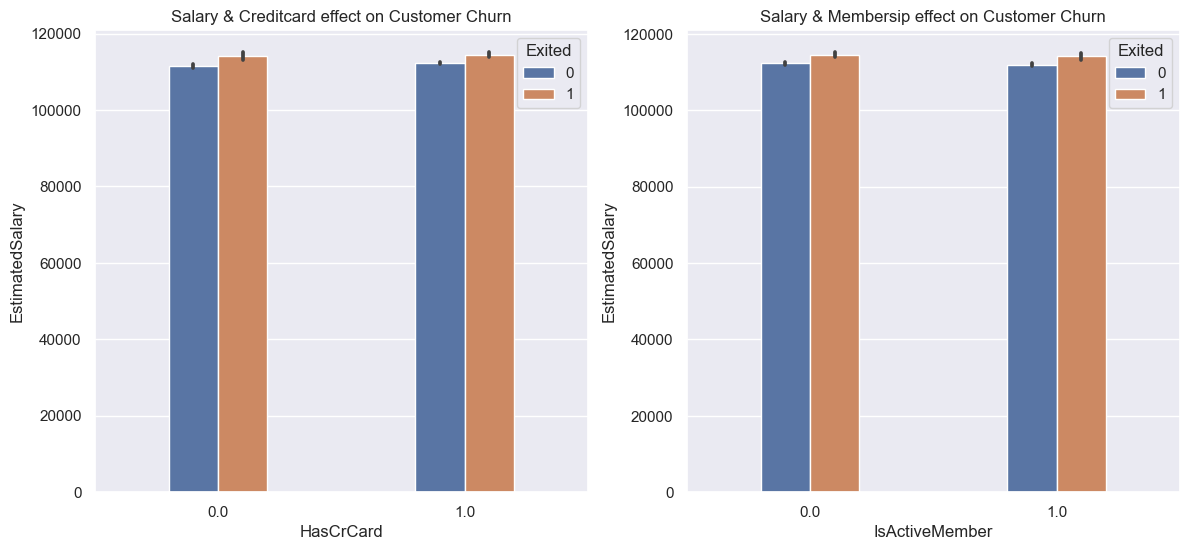

In [18]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sb.barplot(data = df, x= df['HasCrCard'] , y =df['EstimatedSalary'], hue='Exited',width=.4)
plt.title("Salary & Creditcard effect on Customer Churn")

plt.subplot(1,2,2)
sb.barplot(data = df,x='IsActiveMember', y ='EstimatedSalary',hue ='Exited',width =.4)
plt.title("Salary & Membersip effect on Customer Churn")
plt.show()

### 4.8 Does remaining balance effects the churn of customers or not?

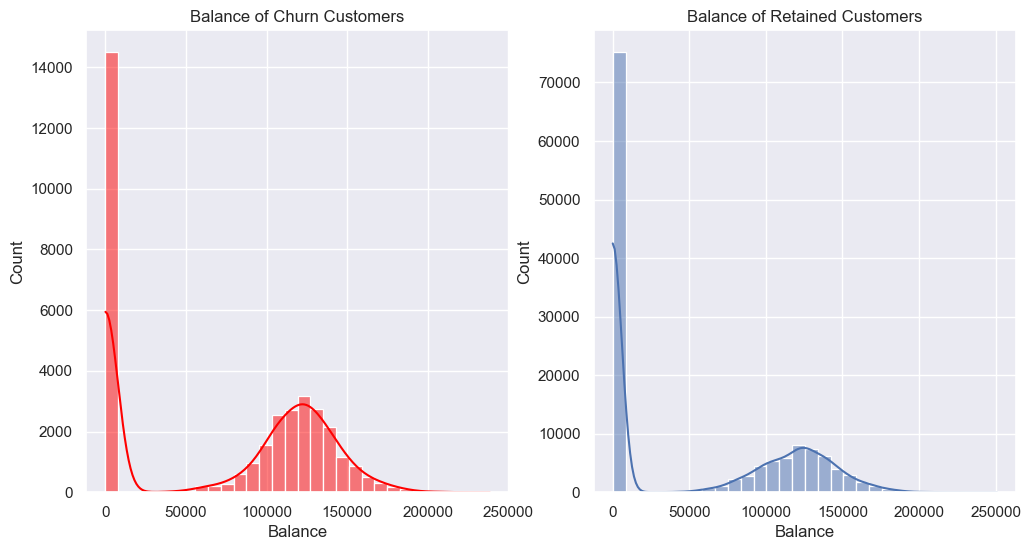

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.histplot(df[df['Exited']==1]['Balance'],bins=30,color='red',kde=True)
plt.title("Balance of Churn Customers")

plt.subplot(1,2,2)
sb.histplot(df[df['Exited']==0]['Balance'],bins=30,kde=True)
plt.title("Balance of Retained Customers")
plt.show()

# 5 Data Preparation for Model training

In [20]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


### 5.1 Dropping unnecessary columns 

In [21]:
dp = df.drop(['id','CustomerId','Surname'],axis=1)
dp.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


### 5.2 Defining the dependent & independent attributes of the dataset

In [22]:
X = dp.drop(['Exited'],axis=1)
Y = dp['Exited']

In [23]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

### 5.3 Splitting the dataset into train & test data

In [24]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.3,random_state=25)

### 5.4 Categorical Feature engineering using One-Hot Encoder

In [25]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

X_train_encoded = encoder.fit_transform(X_train[['Geography','Gender']])
X_train_encoded

<115523x5 sparse matrix of type '<class 'numpy.float64'>'
	with 231046 stored elements in Compressed Sparse Row format>

### 5.5 Converting the sparse matrix back into a Dataframe with their column names

In [26]:
X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(),columns=encoder.get_feature_names_out(['Geography','Gender']))
X_train_encoded_df

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
115518,1.0,0.0,0.0,0.0,1.0
115519,0.0,0.0,1.0,1.0,0.0
115520,1.0,0.0,0.0,0.0,1.0
115521,0.0,1.0,0.0,0.0,1.0


### 5.6 Setting the index back to training data's index for merging the two datasets to appropriate attributes

In [27]:
X_train_encoded_df.index = X_train.index
X_train_encoded_df.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
83335,1.0,0.0,0.0,1.0,0.0
49520,0.0,1.0,0.0,0.0,1.0
135043,0.0,0.0,1.0,0.0,1.0
46313,0.0,0.0,1.0,0.0,1.0
26758,1.0,0.0,0.0,0.0,1.0


### 5.7 Merging the transformed dataset into the original one

In [28]:
selected_columns_df = X_train[['Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
X_train_df = pd.concat([selected_columns_df,X_train_encoded_df], axis=1)
X_train_df.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
83335,29.0,7,0.00,2,1.0,1.0,121053.48,1.0,0.0,0.0,1.0,0.0
49520,41.0,9,139859.54,1,1.0,0.0,116046.22,0.0,1.0,0.0,0.0,1.0
135043,33.0,3,0.00,2,1.0,1.0,127528.83,0.0,0.0,1.0,0.0,1.0
46313,33.0,5,0.00,2,0.0,0.0,167984.64,0.0,0.0,1.0,0.0,1.0
26758,36.0,3,0.00,2,1.0,0.0,126792.91,1.0,0.0,0.0,0.0,1.0


### 5.8 Repeating the same encoding steps for Test data too. Keep in mind the test data is only transformed by the encoder instead of "fit_transform". 

In [29]:
X_test_encoded = encoder.transform(X_test[['Geography','Gender']])

X_test_encoded_df = pd.DataFrame(X_test_encoded.toarray(),columns=encoder.get_feature_names_out(['Geography','Gender']))
X_test_encoded_df.index = X_test.index

selected_columns_df_test = X_test[['Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
X_test_df = pd.concat([selected_columns_df_test,X_test_encoded_df], axis=1)


In [30]:
X_train_df.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
83335,29.0,7,0.00,2,1.0,1.0,121053.48,1.0,0.0,0.0,1.0,0.0
49520,41.0,9,139859.54,1,1.0,0.0,116046.22,0.0,1.0,0.0,0.0,1.0
135043,33.0,3,0.00,2,1.0,1.0,127528.83,0.0,0.0,1.0,0.0,1.0
46313,33.0,5,0.00,2,0.0,0.0,167984.64,0.0,0.0,1.0,0.0,1.0
26758,36.0,3,0.00,2,1.0,0.0,126792.91,1.0,0.0,0.0,0.0,1.0


In [31]:
Y_train

83335     0
49520     0
135043    0
46313     0
26758     0
         ..
130365    0
92303     0
6618      0
90430     1
29828     1
Name: Exited, Length: 115523, dtype: int64

In [32]:
X_test_df.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
70801,33.0,4,96462.84,2,1.0,1.0,159418.66,0.0,1.0,0.0,1.0,0.0
45735,40.0,1,0.00,2,0.0,0.0,1375.51,1.0,0.0,0.0,0.0,1.0
158944,40.0,4,0.00,1,1.0,0.0,155155.25,1.0,0.0,0.0,0.0,1.0
133928,60.0,7,0.00,2,0.0,1.0,107419.12,1.0,0.0,0.0,0.0,1.0
21379,39.0,8,0.00,1,1.0,0.0,149575.87,0.0,0.0,1.0,1.0,0.0


In [33]:
Y_test

70801     0
45735     0
158944    0
133928    0
21379     1
         ..
13905     0
145265    0
150938    1
96620     1
16401     0
Name: Exited, Length: 49511, dtype: int64

# 6. Model Training

### 6.1 DecisionTree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier()

dc.fit(X_train_df,Y_train)

DecisionTreeClassifier()

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
predictions_dc = dc.predict(X_test_df)

# Calculate accuracy
accuracy = accuracy_score(Y_test, predictions_dc)
print(f'Accuracy: {accuracy}')

# Calculate precision
precision = precision_score(Y_test, predictions_dc)
print(f'Precision: {precision}')

# Calculate recall
recall = recall_score(Y_test, predictions_dc)
print(f'Recall: {recall}')

# Calculate F1 score
f1 = f1_score(Y_test, predictions_dc)
print(f'F1 Score: {f1}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions_dc)
print(f'Confusion Matrix:\n{conf_matrix}')


# Now, calculate the AUC score
auc_score = roc_auc_score(Y_test, predictions_dc)
print(f'Area under ROC curve (AUC): {auc_score}')

# Generate classification report
class_report = classification_report(Y_test, predictions_dc)
print(f'Classification Report:\n{class_report}')


Accuracy: 0.7978429035971805
Precision: 0.5261371973587674
Recall: 0.5423007845732111
F1 Score: 0.5340967276451147
Confusion Matrix:
[[33765  5167]
 [ 4842  5737]]
Area under ROC curve (AUC): 0.7047910991601286
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     38932
           1       0.53      0.54      0.53     10579

    accuracy                           0.80     49511
   macro avg       0.70      0.70      0.70     49511
weighted avg       0.80      0.80      0.80     49511



### 6.2 RandomForest Classifer

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train_df,Y_train)

RandomForestClassifier()

In [37]:
predictions_rfc  = rfc.predict(X_test_df)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score,classification_report

# Calculate accuracy
accuracy = accuracy_score(Y_test, predictions_rfc)
print(f'Accuracy: {accuracy}')

# Calculate precision
precision = precision_score(Y_test, predictions_rfc)
print(f'Precision: {precision}')

# Calculate recall
recall = recall_score(Y_test, predictions_rfc)
print(f'Recall: {recall}')

# Calculate F1 score
f1 = f1_score(Y_test, predictions_rfc)
print(f'F1 Score: {f1}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions_rfc)
print(f'Confusion Matrix:\n{conf_matrix}')


# Now, calculate the AUC score
auc_score = roc_auc_score(Y_test, predictions_rfc)
print(f'Area under ROC curve (AUC): {auc_score}')

# Generate classification report
class_report = classification_report(Y_test, predictions_rfc)
print(f'Classification Report:\n{class_report}')


Accuracy: 0.8495283876310314
Precision: 0.6929337772844987
Recall: 0.5311466112108895
F1 Score: 0.6013484589041096
Confusion Matrix:
[[36442  2490]
 [ 4960  5619]]
Area under ROC curve (AUC): 0.7335944707138389
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     38932
           1       0.69      0.53      0.60     10579

    accuracy                           0.85     49511
   macro avg       0.79      0.73      0.75     49511
weighted avg       0.84      0.85      0.84     49511



### 6.3 XGBoost Classifier

In [38]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier()

model_xgb.fit(X_train_df,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
predictions_xgb = model_xgb.predict(X_test_df)

# Calculate accuracy
accuracy = accuracy_score(Y_test, predictions_xgb)
print(f'Accuracy: {accuracy}')

# Calculate precision
precision = precision_score(Y_test, predictions_xgb)
print(f'Precision: {precision}')

# Calculate recall
recall = recall_score(Y_test, predictions_xgb)
print(f'Recall: {recall}')

# Calculate F1 score
f1 = f1_score(Y_test, predictions_xgb)
print(f'F1 Score: {f1}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions_xgb)
print(f'Confusion Matrix:\n{conf_matrix}')


# Now, calculate the AUC score
auc_score = roc_auc_score(Y_test, predictions_xgb)
print(f'Area under ROC curve (AUC): {auc_score}')

# Generate classification report
class_report = classification_report(Y_test, predictions_xgb)
print(f'Classification Report:\n{class_report}')


Accuracy: 0.8624144129587364
Precision: 0.7386291650829849
Recall: 0.5510917856130069
F1 Score: 0.6312256388046774
Confusion Matrix:
[[36869  2063]
 [ 4749  5830]]
Area under ROC curve (AUC): 0.7490509785971127
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     38932
           1       0.74      0.55      0.63     10579

    accuracy                           0.86     49511
   macro avg       0.81      0.75      0.77     49511
weighted avg       0.85      0.86      0.85     49511



# 7. Model Tuning

### Since XGBoost Classifier is gving better classification than other models, let's try to fine-tune this model for optimal parameters

## 7.1 Randomised Search CV

In [40]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV
random_search = RandomizedSearchCV(estimator=model_xgb, param_distributions=param_grid, cv=3, n_jobs=-1, verbose=2, n_iter=100)

# Fit GridSearchCV to training data
random_search.fit(X_train_df, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   verbose=2)

In [41]:
# Retrieve best parameters and best estimator
best_params_rs = random_search.best_params_
best_estimator_rs = random_search.best_estimator_

# Print best parameters
print("Best Parameters:", best_params_rs)
print("Best Estimator:", best_estimator_rs)

Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [44]:
# Use best estimator for predictions
predcitions_rscv = best_estimator_rs.predict(X_test_df)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, predcitions_rscv))
auc_score = roc_auc_score(Y_test, predcitions_rscv)
print(f'Area under ROC curve (AUC): {auc_score}')
print(classification_report(Y_test, predcitions_rscv))

Accuracy: 0.8645553513360668
Area under ROC curve (AUC): 0.7503090649658676
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     38932
           1       0.75      0.55      0.63     10579

    accuracy                           0.86     49511
   macro avg       0.82      0.75      0.78     49511
weighted avg       0.86      0.86      0.86     49511



## 7.2 Grid Search CV

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV to training data
grid_search.fit(X_train_df, Y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             verbose=2)

In [46]:
# Retrieve best parameters and best estimator
best_params_gs = grid_search.best_params_
best_estimator_gs = grid_search.best_estimator_

# Print best parameters
print("Best Parameters:", best_params_gs)
print("Best Estimator:", best_estimator_gs)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 1.0}
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [48]:
# Use best estimator for predictions
predcitions_gscv = best_estimator_gs.predict(X_test_df)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, predcitions_gscv))
print(classification_report(Y_test, predcitions_gscv))

Accuracy: 0.86459574639979
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     38932
           1       0.75      0.55      0.64     10579

    accuracy                           0.86     49511
   macro avg       0.82      0.75      0.78     49511
weighted avg       0.86      0.86      0.86     49511



# 8. Model & Encoder Dump

In [ ]:
# saving the encoder used
pickle.dump(encoder,open('onehotencoder.pkl','wb'))

#saving the model used

pickle.dump(best_estimator_gs,open('xgboostclassifier.pkl','wb'))

# 9. Next steps

#### &#x1F449; Creating a front end Web app using Flask or Streamlit framework #### 

#### &#x1F449; Deploying the Web App #### 